<div style="padding: 10px 20px; background-color: #FFFFFF; text-align: center;">
    <img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" 
         width=400 
         style="margin: 5px auto !important;">
    <h1 align=center>Hacktiv8 PTP Introduction to Data Science Final Projects</h1>
    <h3 align=center>Cyberbullying Classification</h3>
</div>

## Pendahuluan

### Latar Belakang

Sejak beberapa tahun ke belakang, media sosial menjadi salah satu media penyebaran informasi terbesar yang digunakan di masyarakat. Media sosial memberikan ruang untuk setiap individu dapat melakukan produksi, distribusi, dan konsumsi informasi dengan sangat mudah tanpa mengenal ruang dan waktu. Kemudahan dalam menyampaikan informasi dan berekspresi membuat volume data media sosial menjadi sangat besar. Data ini menyimpan berbagai informasi yang berharga. Salah satu penggunaan media sosial dalam di dalam masyarakat sebagai media diskusi atau sekedar penyampaian opini tentang berbagai isu yang berkembang di masyarakat. 

Kemudahan yang dihadirkan media sosial tidak hanya memberikan dampak yang bersifat positif. Salah satu hal yang paling mudah terlihat adalah mudahnya seseorang untuk melakukan bullying atau berkata dengan kebencian terhadap sesama pengguna di media sosial. Hal ini tentunya menjadi masalah yang cukup serius karena memungkinkan terciptanya lingkungan yang buruk bagi masyarakat ketika bermedia sosial. Bukan tidak mungkin banyaknya permasalahan mental yang dialami orang-orang tidak lepas dari kondisi ini. Kondisi ini juga tentunya sangat tidak sesuai dengan budaya Indonesia yang terkenal akan keramahannya antar sesama. Terpisahnya jarak dan tempat yang dihubungkan oleh media sosial rasanya membuat hilangnya budaya masyarakat Indonesia yang selalu sopan dan santun kepada siapa pun.

Efek negatif yang ditimbulkan oleh teknologi seharusnya dapat diatasi oleh teknologi lain. Salah satu solusi untuk mengurangi keberadaan ujaran kebencian dan bullying di media sosial adalah dengan melakukan klasifikasi atas pesan yang diterima untuk meniadakan pesan yang diduga mengandung perundungan. Oleh karena itu, permasalahan yang dianalisis dan dicari solusinya pada implementasi ini adalah klasifikasi cyberbullying atau ujaran kebencian.

### Deskripsi Permasalahan

Implementasi ini bermaksud untuk melakukan klasifikasi kalimat yang mengandung perundungan. Data yang digunakan adalah data berbahasa Inggris karena sulitnya menemukan dataset berbahasa Indonesia. Data yang akan digunakan memiliki 6 label dengan 5 label cyberbullying (**age, religion, ethnicity, gender, other**) dan 1 label **not cyberbullying**. Pada implementasinya saya bermaksud untuk menganalisis terlebih dahulu dan akan menentukan apakah akan menggunakan 6 label atau ditransformasikan menjadi 2 label. 

Jumlah data berada pada angka 47692, dengan tiap datanya berisikan pesan serta labelnya. Nantinya data ini akan di-encode menjadi representasi vector sebelum masuk ke dalam algoritma pembelajaran. Tujuan utama klasifikasi adalah membedakan kalimat cyberbullying dan yang bukan.

### Data Overview

#### Import Pustaka

In [1]:
%matplotlib inline 

import re
import string
import nltk
import pickle
import warnings

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from wordcloud import STOPWORDS

from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier

from xgboost import XGBClassifier

In [2]:
sns.set_style("white")
pd.options.mode.chained_assignment = None
pd.set_option('display.max_colwidth', None)
warnings.simplefilter(action="ignore", category=FutureWarning)

#### Persiapan Data

In [3]:
df = pd.read_csv('dataset/en_cyberbullying.csv')
df = df.rename(columns={"tweet_text":"text", "cyberbullying_type": "label"})

#### Cuplikan Data

In [4]:
df

,text,label
0,"In other words #katandandre, your food was crapilicious! #mkr",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImACelebrityAU #today #sunrise #studio10 #Neighbours #WonderlandTen #etc,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red velvet cupcakes?,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, but not too concerned about another angry dude on twitter.",not_cyberbullying
4,"@RudhoeEnglish This is an ISIS account pretending to be a Kurdish account. Like Islam, it is all lies.",not_cyberbullying
...,...,...
47687,"Black ppl aren't expected to do anything, depended on for anything. Yet free to participate, work, enjoy the freedom of humans all across this globe. If you waste your energy on the past you will be wasting it for building the future.",ethnicity
47688,Turner did not withhold his disappointment. Turner called the court an “abominable conclave of negro hating demons” (with one exception) who “issued another decree that colored men and women must be driven into Jim Crow cars whenever it suits the whim of any white community.”,ethnicity
47689,I swear to God. This dumb nigger bitch. I have got to bleach my hair reeeeeal fuckin' soon. D:&lt; FUCK.,ethnicity
47690,"Yea fuck you RT @therealexel: IF YOURE A NIGGER FUCKING UNFOLLOW ME, FUCKING DUMB NIGGERS.",ethnicity


Teramati bahwa data masih sangat kotor karena diambil dari media sosial sehingga masih memiliki mention, hashtag, hingga url. Diperlukan preprocessing untuk menangani ini.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    47692 non-null  object
 1   label   47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [6]:
df.isnull().sum()

text     0
label    0
dtype: int64

### Preprocessing
Method preprocessing digunakan untuk mentransformasikan teks pesan dari media sosial menjadi lebih bersih dan tidak lagi mengandung entitas yang kurang diperlukan. Beberapa hal yang dilakukan adalah :
- Lowercasing
- Hapus URL, mention, Hashtag
- Hapus STOPWORDS atau kata yang sangat sering muncuk dan tidak perlu
- Hapus selain huruf sehingga vektor nanti hanya terdiri dari kata

In [7]:
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

STOPWORDS.update(['did', 'rt', 'will', 'im', 'thing'])

def show_wordcloud(data):
    words = ''
     
    for sentence in data:
     
        tokens = str(sentence).split()
         
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
         
        words += " ".join(tokens) + " "
     
    wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size = 12).generate(words)
     
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
     
    plt.show()
    
def show_top_ngram(df_column):
    
    vectorizer = TfidfVectorizer(ngram_range=(2,2))

    ngrams = vectorizer.fit_transform(df_column)
    count_values = ngrams.toarray().sum(axis=0)
    vocab = vectorizer.vocabulary_
    df_ngram = pd.DataFrame(sorted([(count_values[i],k) for k,i in vocab.items()], reverse=True)).rename(columns={0: 'frequency', 1:'bigram/trigram'})

    return df_ngram

def delete_url(text):
    links = re.findall(re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL), text)
    for link in links:
        text = text.replace(link[0], ' ')    
    return text

def delete_mention_tag(text):
               
    # filter kata yang mengandung penanda mention dan hashtag
    words = []
    for word in text.split():
        word = word.strip()
        if word:
            if word[0] not in ['@','#']:
                words.append(word)
    return ' '.join(words)

def preprocessing(text):
    text = text.lower()                    # convert ke lowercase
    text = delete_url(text)                # hapus URL/link
    text = delete_mention_tag(text)        # hapus entitas mention dan hashtags
    text = text.strip()
    text = " ".join([word for word in text.split() if not word in set(STOPWORDS)]) 
    text = re.sub(r" \d+ ", " ", text)     # hapus digit
    text = text.translate(str.maketrans("", "", string.punctuation))
    text = re.sub(r"[^a-z ]", "", text)
    text = re.sub(r"  ", " ", text)
    return text

#### Aplikasikan Preprocessing ke Dataset

In [8]:
df['text'] = df.apply(lambda row: preprocessing(row.text), axis=1)

#### Kondisi Persebaran Label

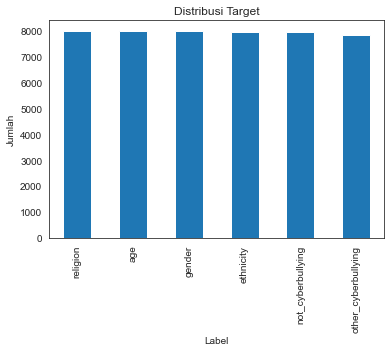

In [9]:
df['label'].value_counts().plot.bar(figsize=(6, 4));

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

Label sangat seimbang, namun ketika proses pemantauan wordcloud pada bagian selanjutnya, ditemukan bahwa pada label age dan other ditemukan banyak anotasi yang seharusnya counter terhadap bullying sehingga salah jika dimasukkan bullying. Oleh karena itu pada pesan yang mengandung kata bully maka diubah labelnya.

In [10]:
df.loc[df['text'].str.contains("bully|bullied|bullies"), 'label'] = "not_cyberbullying"

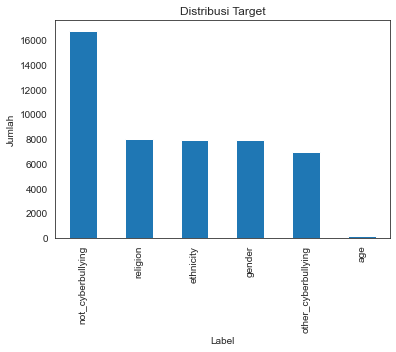

In [11]:
df['label'].value_counts().plot.bar(figsize=(6, 4));

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

Data menjadi cukup imbalance, dan jumlah kategori bullying age sangat minim, tidak diketahui secara jelas pula maksud dari kategori ini sehingga diputuskan digabung dengan other.

In [12]:
df.loc[df['label'] == 'age', 'label'] = 'other_cyberbullying'

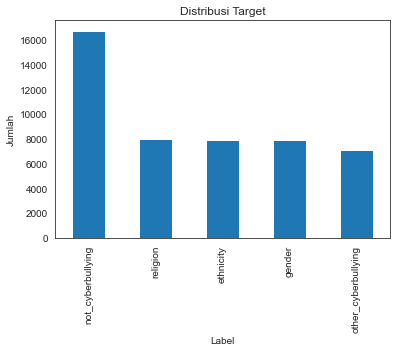

In [13]:
df['label'].value_counts().plot.bar(figsize=(6, 4));

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

Data cukup balance kecuali pada label not_cyberbullying. Hal ini cukup baik dan akan ditangani nanti sebelum penggunaan.

### Pengenalan Data Lanjut

#### Perbandingan/Distribusi Kelas

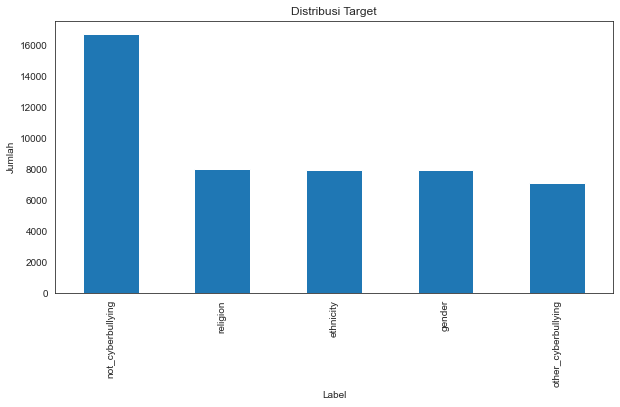

In [14]:
df['label'].value_counts().plot.bar(figsize=(10, 5));

plt.title('Distribusi Target');
plt.xlabel('Label');
plt.ylabel('Jumlah');

Seperti yang telah dijelaskan sebelumnya bahwa sekarang terdapat 5 label dan terdapat imbalance pada kategori not_bullying. Hal ini cukup baik karena untuk penggunaan 5 label, kategori yang berlebih dapat dikurangi. Dan ketika penggunaan 2 label maka data yang dimiliki menjadi cukup banyak . 

#### Distribusi Panjang Kata Pesan

In [15]:
df['text_length'] = df.apply(lambda row: len(row.text.split()), axis=1)

In [16]:
df

,text,label,text_length
0,words food crapilicious,not_cyberbullying,3
1,white,not_cyberbullying,1
2,classy whore red velvet cupcakes,not_cyberbullying,5
3,meh p thanks heads up concerned another angry dude twitter,not_cyberbullying,10
4,isis account pretending kurdish account islam lies,not_cyberbullying,7
...,...,...,...
47687,black ppl expected anything depended anything yet free participate work enjoy freedom humans across globe waste energy past wasting building future,ethnicity,21
47688,turner withhold disappointment turner called court abominable conclave negro hating demons with one exception issued another decree colored men women must driven jim crow cars whenever suits whim white community,ethnicity,30
47689,swear god dumb nigger bitch got bleach hair reeeeeal fuckin soon dlt fuck,ethnicity,13
47690,yea fuck youre nigger fucking unfollow me fucking dumb niggers,ethnicity,10


Boxplot Keseluruhan Data

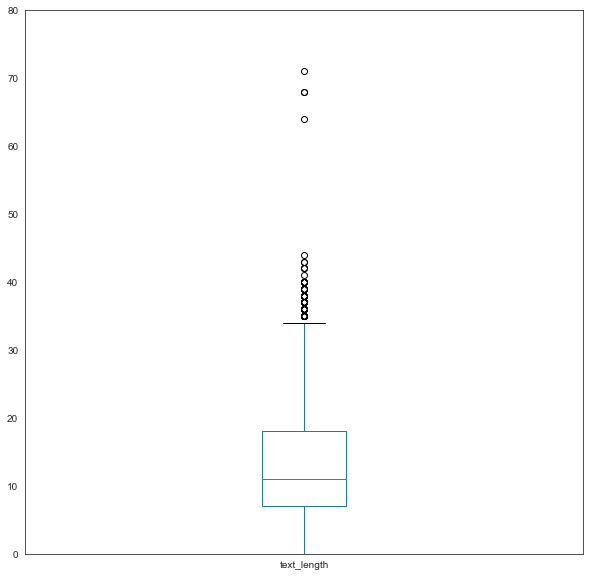

In [17]:
disp = df.boxplot(column = ['text_length'], grid = False, figsize=(10, 10))
plt.ylim(0, 80)
plt.show();

Panjang pesan cukup beragam. Dapat dilihat pada boxplot diatas panjang kata rata-rata berada sekitar angka 12 dan distribusinya lebih dekat ke kurang lebih 10 kata. Kata diatas 35 kata sudah mulai jarang sehingga terdeteksi sebagai pencilan. Informasi ini dapat menjadi bahan pemotongan jumlah kata jika nantinya diperlukan.

Histogram Distribusi Panjang Data

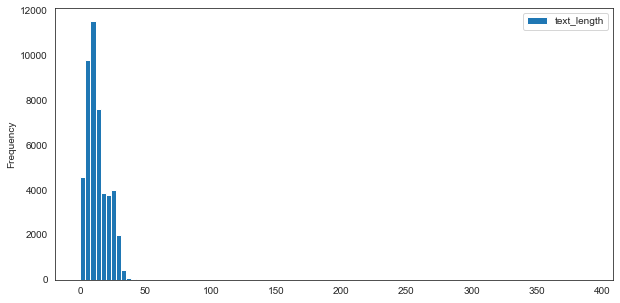

In [18]:
df.plot.hist(bins=100, figsize=(10, 5))
plt.show();

Boxplot Per Label

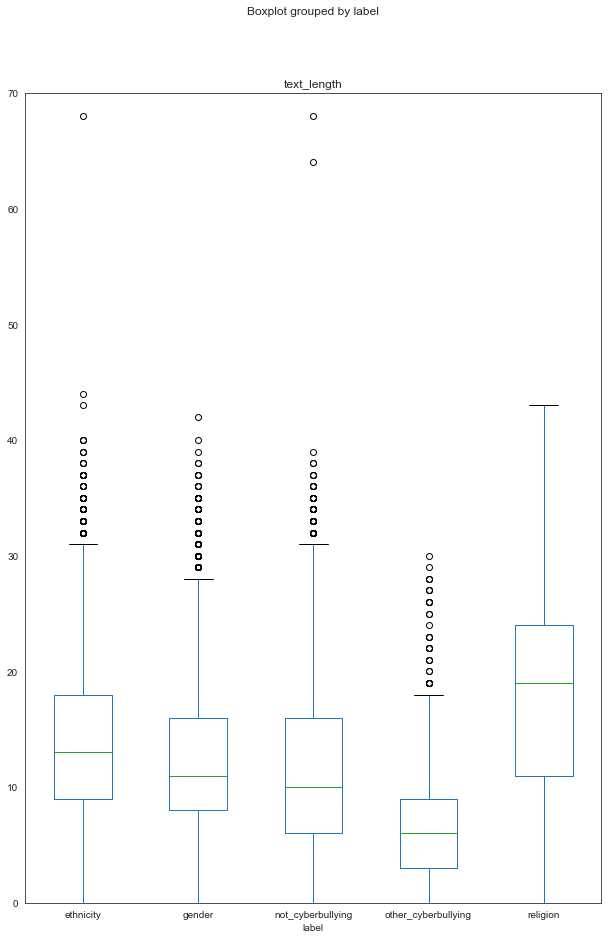

In [19]:
disp = df.boxplot(by ='label', column=['text_length'], grid = False, figsize=(10, 15))
plt.ylim(0, 70)
plt.show();

Persebaran yang cukup berbeda terlihat pada kelas other dan religion. Kelas other jumlah katanya cenderung lebih sedikit sedangkan relogion lebih panjang. Bahkan terlihat kategori bullying religion rata-rata panjang kalimatnya lebih dari 20 kata. Catatan untuk visualisasi ini sebenarnya masih terdapat outlier yang jauh diatas 70, namun demi kenyamanan visual tidak ditampilkan.

### Distribusi Kata
Untuk setiap kelasnya, coba dianalisis kata-kata yang dominan dengan menggunakan wordcloud. Beberapa kata yang kurang merepresentasikan nantinya akan ditambahkan ke dalam STOPWORDS sehingga tidak mempengaruhi klasifikasi. Selain itu juga ditampilkan 20 bigram teratas untuk memperlihatkan kemunculan bigram penanda kelas.

#### Distribusi Kata Keseluruhan

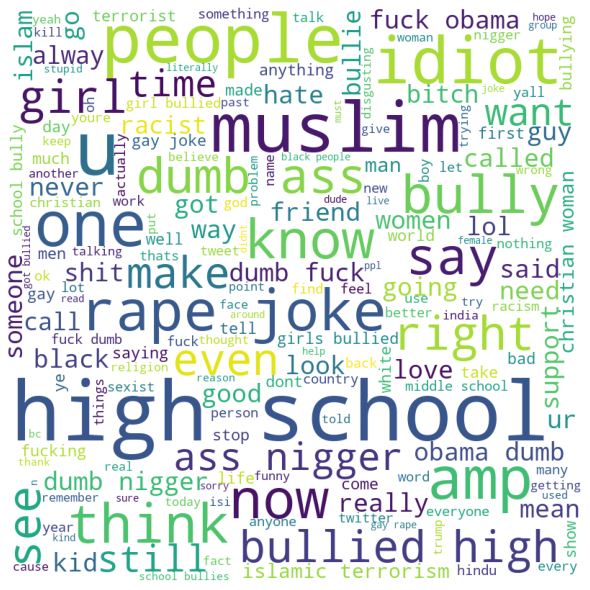

In [20]:
show_wordcloud(df['text'])

#### Distribusi Kata Kelas Cyberbullying Kategori Ethnicity

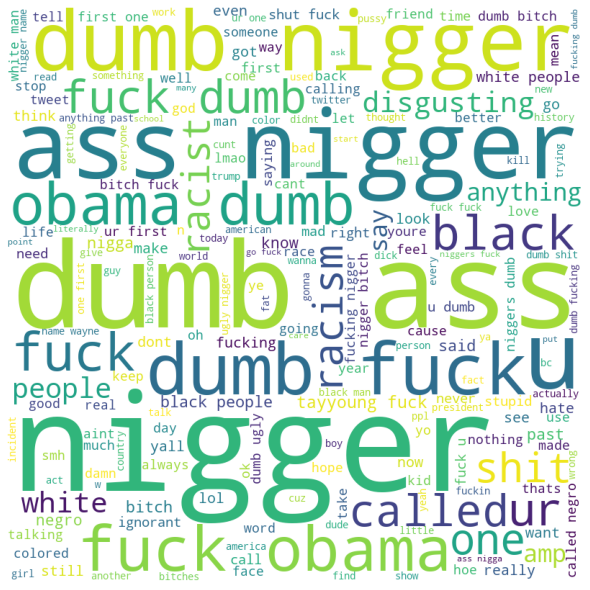

In [21]:
show_wordcloud(df[df['label'] == 'ethnicity']['text'])

In [22]:
show_top_ngram(df[df['label'] == 'ethnicity']['text'])[:20]

,frequency,bigram/trigram
0,213.305124,dumb ass
1,189.327820,ass nigger
2,176.910136,fuck obama
3,175.592079,obama dumb
4,170.909339,dumb nigger
5,154.429092,fuck dumb
6,125.747331,dumb fuck
7,85.476927,tayyoung fuck
8,54.088671,dumb niggers
9,49.378141,nigger fuck


#### Distribusi Kata Kelas Cyberbullying Kategori Gender

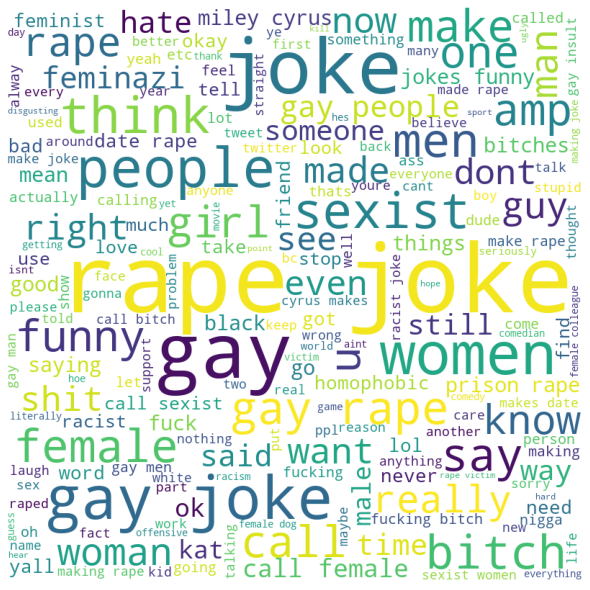

In [23]:
show_wordcloud(df[df['label'] == 'gender']['text'])

In [24]:
show_top_ngram(df[df['label'] == 'gender']['text'])[:20]

,frequency,bigram/trigram
0,135.979559,rape jokes
1,102.059089,rape joke
2,79.783246,gay jokes
3,69.261102,gay rape
4,46.537950,miley cyrus
5,44.646524,jokes rape
6,42.103827,jokes gay
7,39.919787,joke gay
8,38.907424,date rape
9,35.170511,jokes funny


#### Distribusi Kata Kelas Cyberbullying Kategori Religion

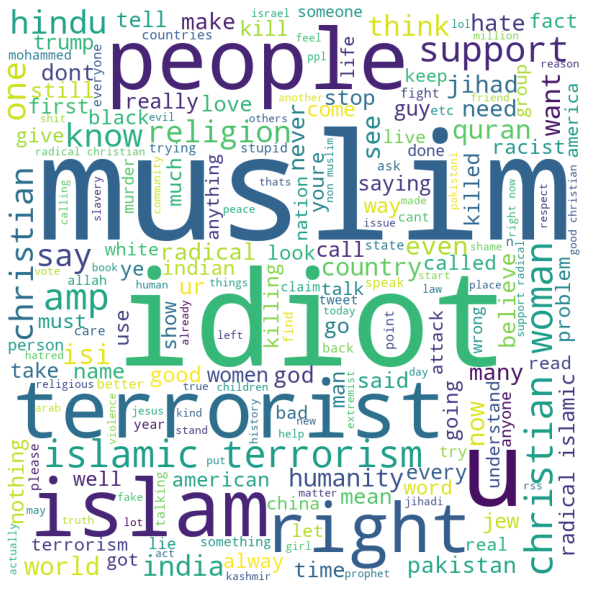

In [25]:
show_wordcloud(df[df['label'] == 'religion']['text'])

In [26]:
show_top_ngram(df[df['label'] == 'religion']['text'])[:20]

,frequency,bigram/trigram
0,80.243537,islamic terrorism
1,79.904283,christian woman
2,28.869020,radical islamic
3,19.209683,woman right
4,18.734696,good christian
5,15.751166,support radical
6,13.641645,right now
7,13.598740,prophet mohammed
8,12.707885,years ago
9,12.457554,radical islam


#### Distribusi Kata Kelas Cyberbullying Kategori Other Cyberbullying

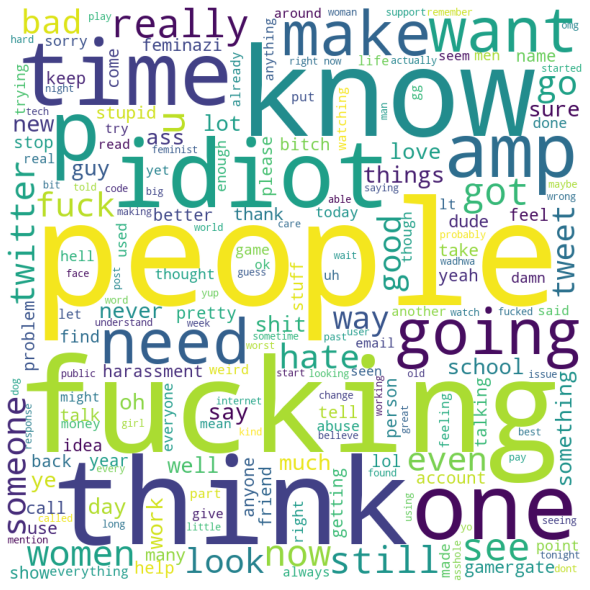

In [27]:
show_wordcloud(df[df['label'] == 'other_cyberbullying']['text'])

In [32]:
show_top_ngram(df[df['label'] == 'other_cyberbullying']['text'])[:20]

,frequency,bigram/trigram
0,13.671648,right now
1,13.366784,fucking hate
2,10.634239,oh god
3,6.831483,ugly ass
4,6.232639,hate cats
5,6.012769,holy shit
6,5.857430,fucking idiot
7,5.597453,called feminazi
8,5.548276,stupid ass
9,5.313592,thank you


#### Distribusi Kata Kelas Cyberbullying Kategori Not Cyberbullying

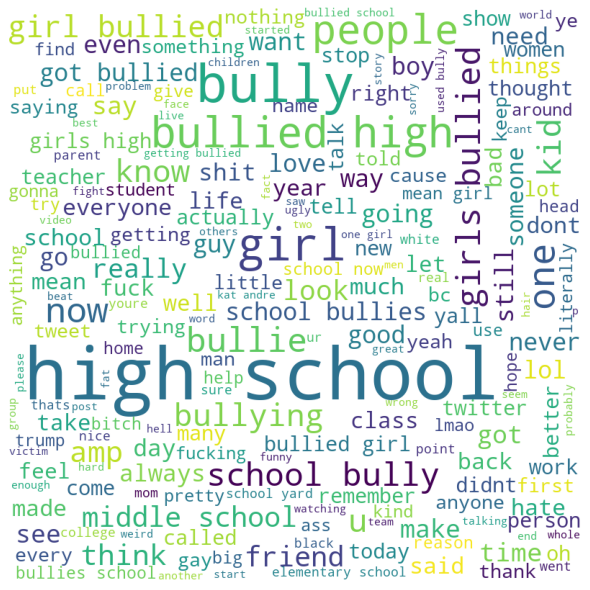

In [29]:
show_wordcloud(df[df['label'] == 'not_cyberbullying']['text'])

In [35]:
show_top_ngram(df.loc[df['label'] == 'not_cyberbullying'][:5000]['text'])[:20]

,frequency,bigram/trigram
0,20.899252,kat andre
1,7.407029,kat amp
2,7.181752,instant restaurants
3,6.878713,amp andre
4,6.834372,bully beatdown
5,6.832440,lemon tart
6,6.776385,isso bullying
7,5.985931,high school
8,5.668856,back school
9,5.593641,instant restaurant


Terdapat catatan untuk kelas not bullying ini, ditemukan bahwa domain nya sangat erat dengan school sehingga berpotensi bias. Namun dikarenakan keterbatasan data berlabel, saya coba tetap menggunakan ini terlebih dahulu untuk nantinya dapat ditambahkan dengan pesan yang diberi label sendiri.

## Eksperimen Model

### Pendefinisian Kelas Pipeline
Dikarenakan diperlukan preprocessing pada text input sebelum di-encoding, maka dibuat kelas baru yang fungsinya mirip dengan fungsi pipeline dari sklearn. Objek dari kelas ini nantinya akan menjadi model yang disimpan untuk deployment karena sudah termasuk preprocessing text dan juga sekaligus menyimpan berbagai model pemrosesan seperti sampling, vectorizer, encoder, hingga classifier.

In [36]:
df = df.drop('text_length', axis=1)

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import ConfusionMatrixDisplay

class ModelPipeline:
    def __init__(self, imbalance_handler, vectorizer, encoder, classifier):
        self.imbalance_handler = imbalance_handler
        self.vectorizer = vectorizer
        self.encoder = encoder
        self.classifier = classifier
        
    def encoder(self):
        return self.encoder
    
    def fit(self, X_train, y_train):
        X_train, y_train = self.imbalance_handler.fit_resample(X_train, y_train)
        
        self.vectorizer.fit(X_train['text'].values)
        X_train = self.vectorizer.transform(X_train['text'].values)
        
        self.encoder.fit(y_train)
        y_train = pd.DataFrame(self.encoder.transform(y_train.values.ravel()))
    
        return self.classifier.fit(X_train, y_train.values.ravel())
    
    def predict(self, X_test):
        X_test['text'] = X_test.apply(lambda row: preprocessing(row.text), axis=1)
        X_test = self.vectorizer.transform(X_test['text'].values)
        return self.classifier.predict(X_test)
    
    def predict_proba(self, X_test):
        X_test['text'] = X_test.apply(lambda row: preprocessing(row.text), axis=1)
        X_test = self.vectorizer.transform(X_test['text'].values)
        return self.classifier.predict_proba(X_test)[:, 1]
    
    def classification_report(self, y_test, y_pred):
        y_test = pd.DataFrame(self.encoder.transform(y_test))
        return classification_report(y_test, y_pred, target_names=self.encoder.classes_)
    
    def precision_recall_curve(self, y_test, y_pred):
        y_test = pd.DataFrame(self.encoder.transform(y_test))
        display = PrecisionRecallDisplay.from_predictions(
            y_test, y_pred, name="NaiveBayes", ax = plt.gca()
        )
        res = display.ax_.set_title("Precision-Recall Curve")
        return res
    
    def confusion_matrix_display(self, y_test, y_pred):
        y_test = pd.DataFrame(self.encoder.transform(y_test))
        
        fig, axn = plt.subplots(1, 2, sharex=True, sharey=True, figsize=(16, 8))
        
        display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[0], cmap=plt.cm.Blues, normalize=None, display_labels=self.encoder.classes_, xticks_rotation='vertical')
        display.ax_.set_title("Confusion Matrix Non Normalized")
        
        display = ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axn[1], cmap=plt.cm.Blues, normalize='true', display_labels=self.encoder.classes_, xticks_rotation='vertical')
        display.ax_.set_title("Confusion Matrix Normalized")
        
        plt.show();

### Splitting Data

#### Data 5 Label

In [38]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=11)

#### Data 2 Label

In [39]:
from sklearn.model_selection import train_test_split

df_biner = df
df_biner.loc[df_biner['label'] != "not_cyberbullying", 'label'] = "cyberbullying"

X_biner = df_biner.drop('label', axis=1)
y_biner = df_biner['label']

X_biner_train, X_biner_test, y_biner_train, y_biner_test = train_test_split(X_biner, y_biner, test_size=0.1, random_state=11)

### Perbandingan Vectorizer berbasis TF-IDF dan Count Frekuensi
**TF-IDF** adalah algoritma yang berguna untuk menghitung bobot setiap kata yang digunakan dalam klasifikasi sehingga didapatkan bobot yang merepresentasikan kata penting dalam klasifikasi. Konsepnya adalah dengan melakukan perbandingan term frequency dengan inverse dari document frequency. Kata yang penting untuk klasifikasi seharusnya cukup banyak muncul tapi tidak muncul hampir di semua data. Ini yang membuat TF-IDF menjadi powerful karena dapat menyingkirkan kata yang hampir setiap data muncul dan mengurangi kata yang kurang dapat menjadi pembeda. Sedangkan algoritma CountVectorizer hanya berbasiskan frekuensi saja.

Untuk memastikan bahwa filtering yang dilakukan TF-IDF dilakukan eksperimen perbandingan performa dengan  model yang berbeda.

#### Model TF-IDF

                   precision    recall  f1-score   support

    cyberbullying       0.82      0.99      0.90      3104
not_cyberbullying       0.96      0.59      0.73      1666

         accuracy                           0.85      4770
        macro avg       0.89      0.79      0.81      4770
     weighted avg       0.87      0.85      0.84      4770



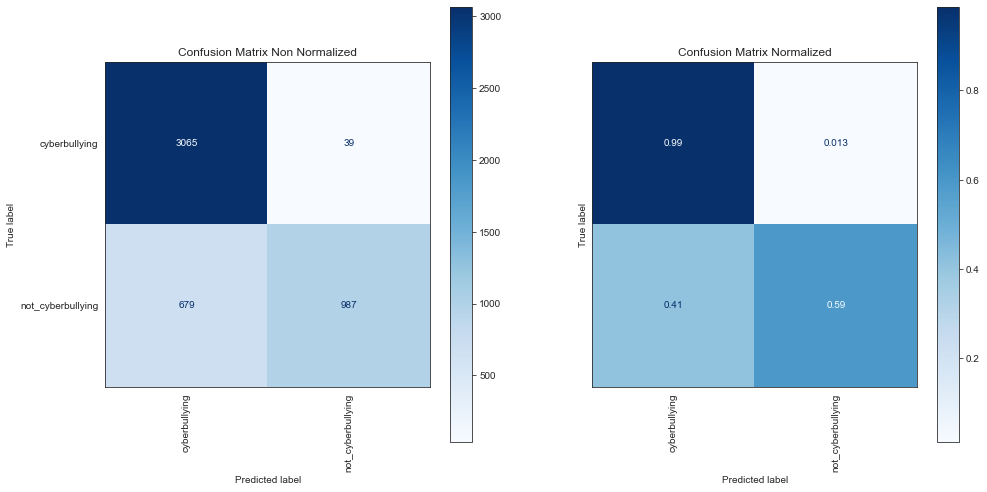

In [40]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Model Count Frequency

                   precision    recall  f1-score   support

    cyberbullying       0.83      0.97      0.89      3104
not_cyberbullying       0.91      0.62      0.74      1666

         accuracy                           0.85      4770
        macro avg       0.87      0.79      0.81      4770
     weighted avg       0.85      0.85      0.84      4770



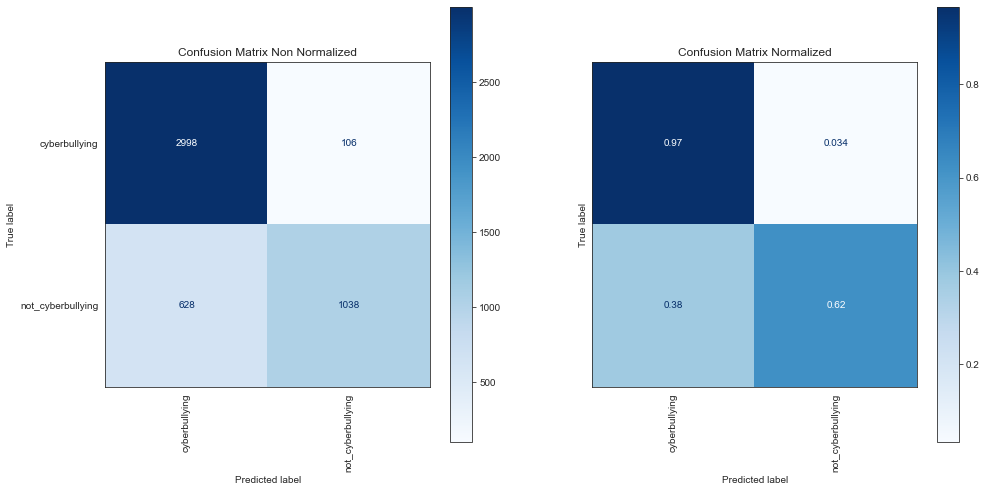

In [41]:
pipeline = ModelPipeline(RandomUnderSampler(), CountVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

Terlihat bahwa walau dalam perbedaan yang sangat kecil, namun ada efek yang diberikan TF-IDF sehingga selanjutnya vectorizer yang digunakan adalah TF-IDF.

### Perbandingan Vectorizer berbasis Undersample dan Oversample untuk Handling Imbalance
Untuk menentukan teknik terbaik untuk mengatasi data yang tidak seimbang rasionya, dibuat 2 model sebagai pembanding.

#### Model Oversample

                   precision    recall  f1-score   support

    cyberbullying       0.82      0.98      0.89      3104
not_cyberbullying       0.95      0.60      0.73      1666

         accuracy                           0.85      4770
        macro avg       0.89      0.79      0.81      4770
     weighted avg       0.87      0.85      0.84      4770



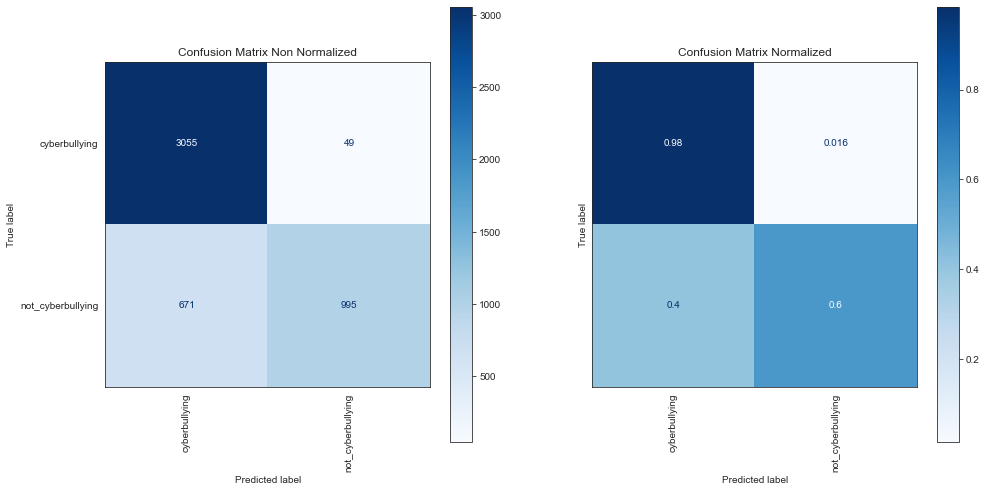

In [42]:
pipeline = ModelPipeline(RandomOverSampler(), TfidfVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Model Undersample

                   precision    recall  f1-score   support

    cyberbullying       0.81      0.98      0.89      3104
not_cyberbullying       0.95      0.58      0.72      1666

         accuracy                           0.84      4770
        macro avg       0.88      0.78      0.80      4770
     weighted avg       0.86      0.84      0.83      4770



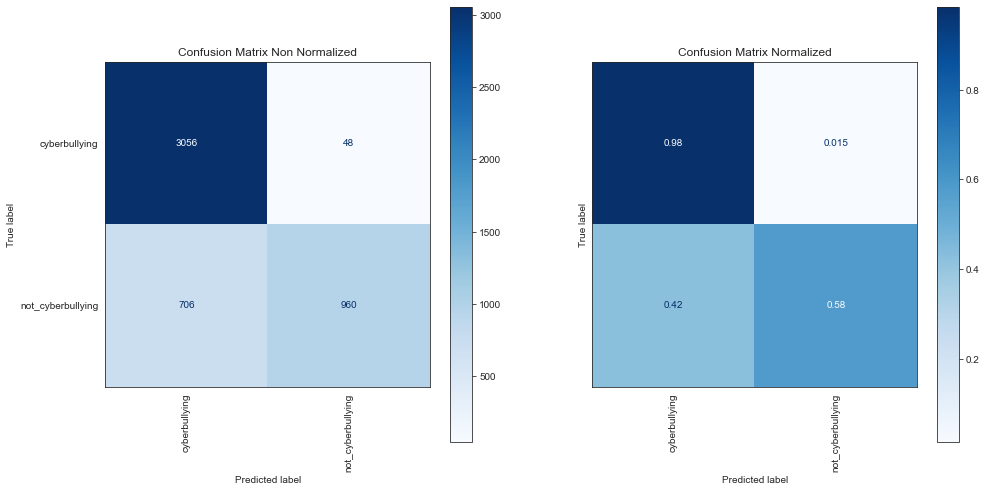

In [43]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

Ternyata perbedaannya tidak signifikan sehingga untuk efisiensi proses dan waktu, digunakan **undersampling** sehingga jumlah datanya tidak meningkat.

### Perbandingan Basis 1-grams dan 2-grams
Salah satu alternatif representasi encoding untuk pembelajaran mesin adalah bigram atau n-grams. Untuk melihat pengaruhnya, coba dibandingkan antara representasi kata dan bigram

#### Model Kata

                   precision    recall  f1-score   support

    cyberbullying       0.82      0.98      0.89      3104
not_cyberbullying       0.95      0.60      0.74      1666

         accuracy                           0.85      4770
        macro avg       0.88      0.79      0.82      4770
     weighted avg       0.87      0.85      0.84      4770



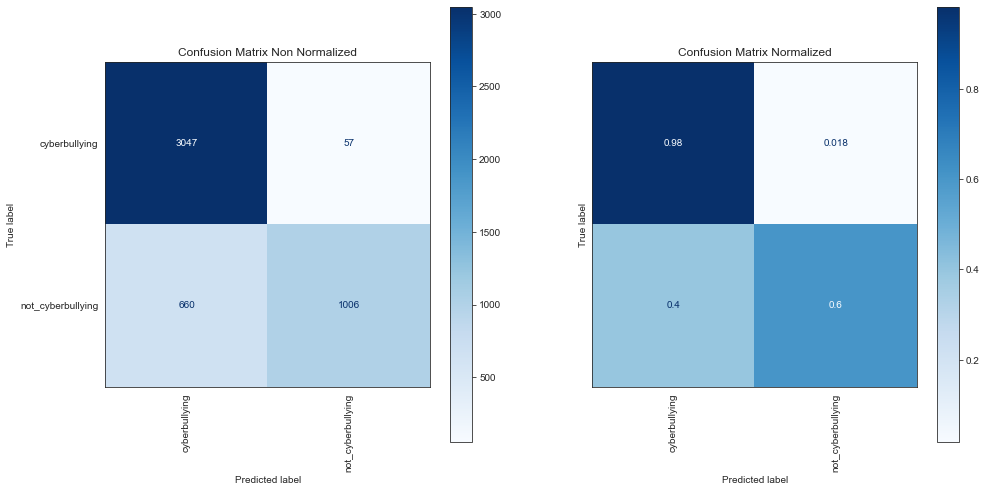

In [44]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000, ngram_range=(1,1)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Model Bigram

                   precision    recall  f1-score   support

    cyberbullying       0.75      1.00      0.86      3104
not_cyberbullying       0.99      0.38      0.55      1666

         accuracy                           0.78      4770
        macro avg       0.87      0.69      0.71      4770
     weighted avg       0.83      0.78      0.75      4770



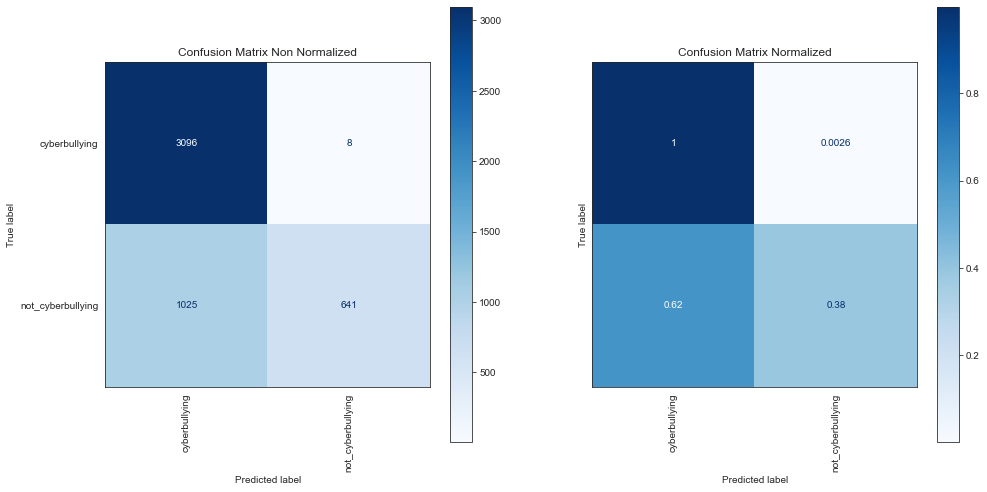

In [45]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=2000, ngram_range=(2,2)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

Terlihat bahwa untuk kasus ini masih lebih baik menggunakan basis kata dibandingkan bigram. Skor F1 untuk setiap kelas unggul pada representasi kata. Hal ini mungkin karena pendeteksian bullying masih lebih sensitif atas kata dibandingkan bigram yang mungkin sudah mengandung semantik yang lebih detail.

Untuk itu untuk eksperimen selanjutnya akan menggunakan basis kata.

### Perbandingan Algoritma Pembelajaran Mesin

#### Model Random Forest Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.94      0.75      0.83      3104
not_cyberbullying       0.66      0.91      0.77      1666

         accuracy                           0.81      4770
        macro avg       0.80      0.83      0.80      4770
     weighted avg       0.84      0.81      0.81      4770



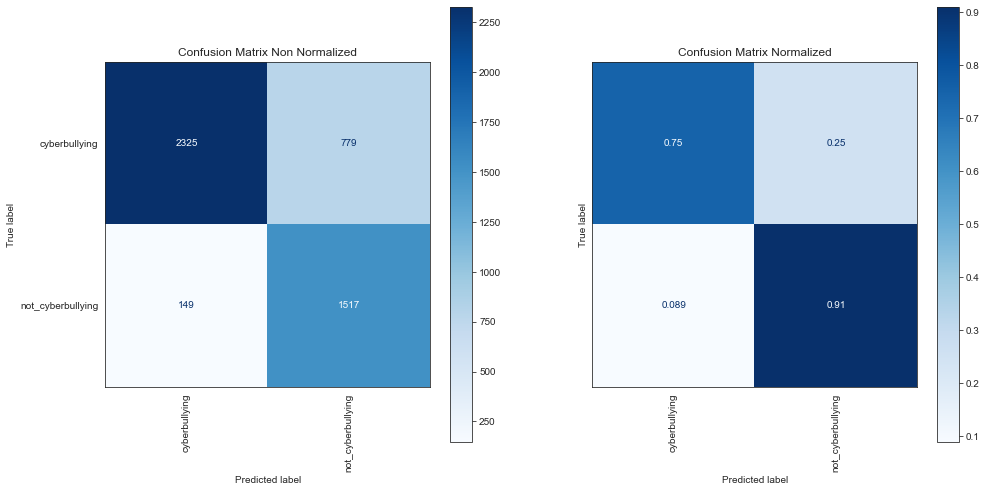

In [46]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Naive Bayes Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.90      0.83      0.86      3104
not_cyberbullying       0.73      0.82      0.77      1666

         accuracy                           0.83      4770
        macro avg       0.81      0.83      0.82      4770
     weighted avg       0.84      0.83      0.83      4770



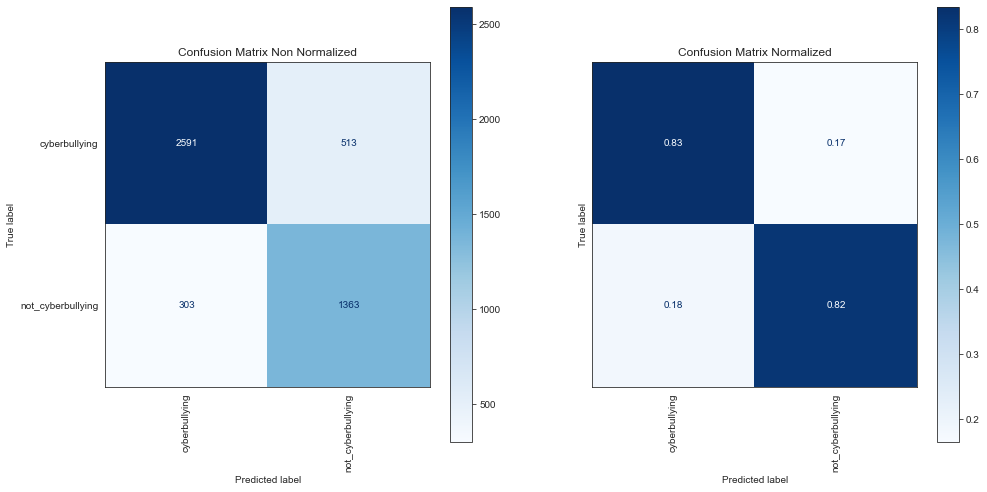

In [47]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), MultinomialNB())
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Decision Tree Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.82      0.99      0.90      3104
not_cyberbullying       0.98      0.59      0.73      1666

         accuracy                           0.85      4770
        macro avg       0.90      0.79      0.82      4770
     weighted avg       0.87      0.85      0.84      4770



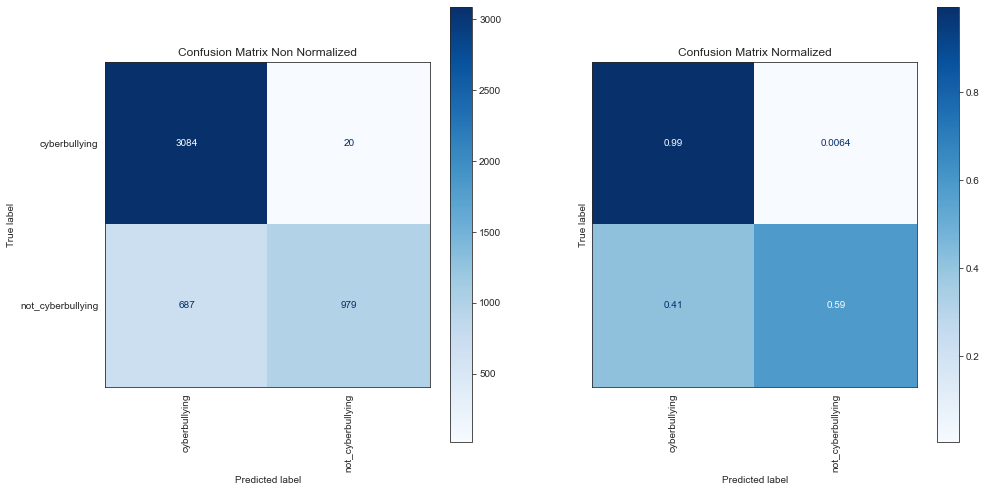

In [48]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), DecisionTreeClassifier(max_depth=5))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Neural Network MLP Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.90      0.79      0.84      3104
not_cyberbullying       0.69      0.84      0.76      1666

         accuracy                           0.81      4770
        macro avg       0.79      0.82      0.80      4770
     weighted avg       0.83      0.81      0.81      4770



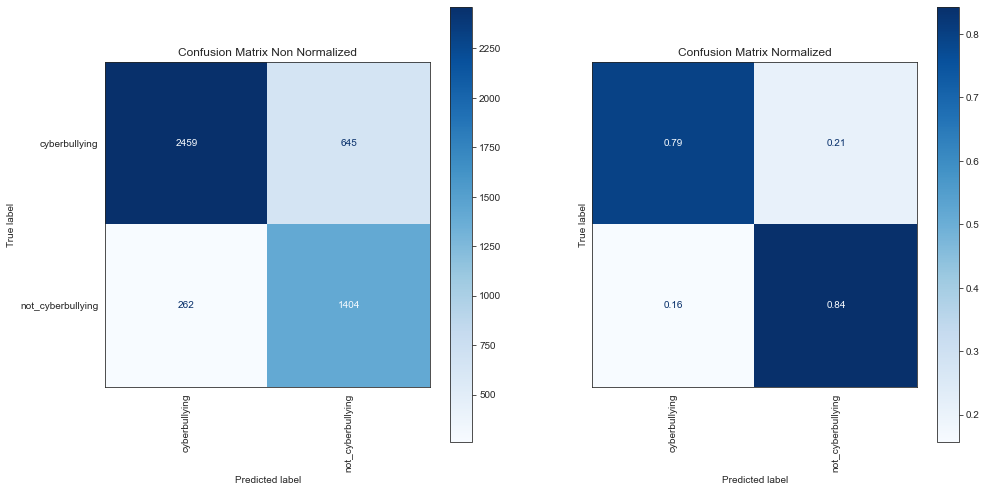

In [49]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), MLPClassifier(solver='adam', max_iter=300, alpha=1e-5, hidden_layer_sizes=(30, 30), random_state=1))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### kNN Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.69      0.97      0.80      3104
not_cyberbullying       0.75      0.19      0.30      1666

         accuracy                           0.69      4770
        macro avg       0.72      0.58      0.55      4770
     weighted avg       0.71      0.69      0.63      4770



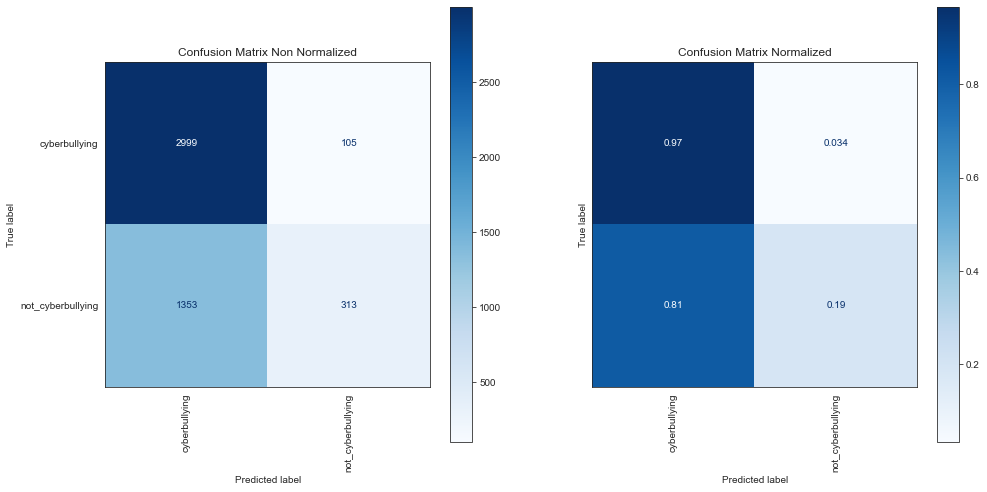

In [50]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), KNeighborsClassifier(n_neighbors=2))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

Semakin kecil k, didapatkan bahwa akurasi dan metric lainnya semakin baik. Mungkin dikarenakan pencarian kemiripan yang cukup 1-3 saja untuk melakukan klasifikasi dan jika lebih maka akan kurang sesuai.

#### Logistic Regression Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.91      0.84      0.87      3104
not_cyberbullying       0.74      0.84      0.79      1666

         accuracy                           0.84      4770
        macro avg       0.82      0.84      0.83      4770
     weighted avg       0.85      0.84      0.84      4770



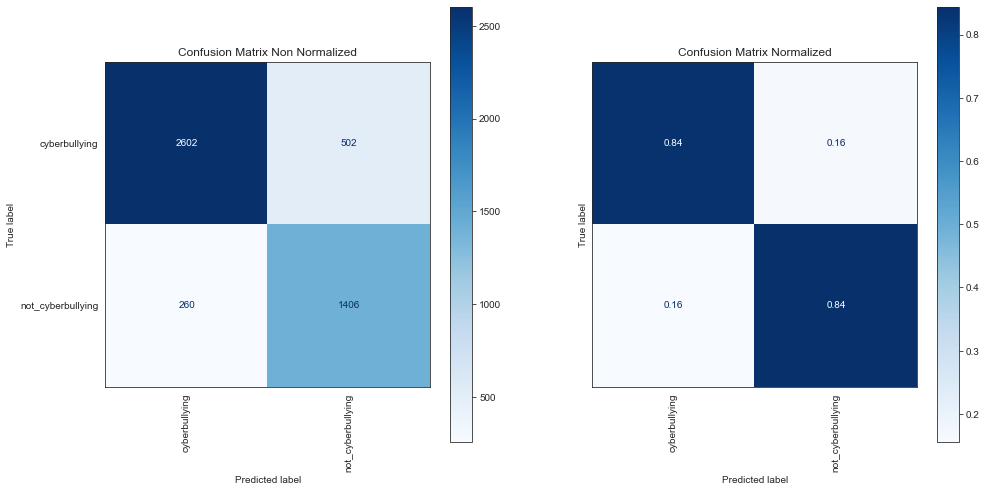

In [51]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LogisticRegression(solver='lbfgs', max_iter=2000))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### Linear SVM Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.90      0.83      0.87      3104
not_cyberbullying       0.73      0.83      0.78      1666

         accuracy                           0.83      4770
        macro avg       0.81      0.83      0.82      4770
     weighted avg       0.84      0.83      0.83      4770



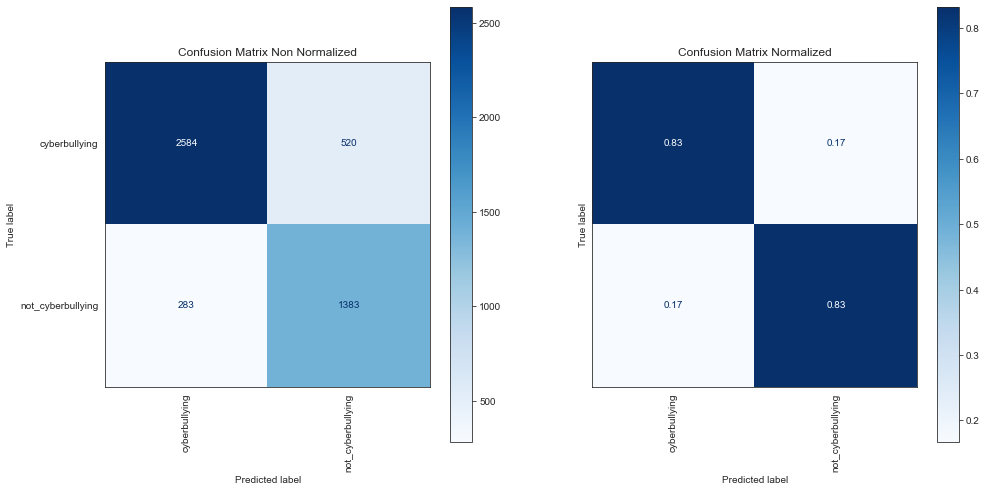

In [52]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LinearSVC(max_iter=10000))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

#### XGBoost Classifier

                   precision    recall  f1-score   support

    cyberbullying       0.93      0.80      0.86      3104
not_cyberbullying       0.70      0.89      0.79      1666

         accuracy                           0.83      4770
        macro avg       0.82      0.85      0.82      4770
     weighted avg       0.85      0.83      0.84      4770



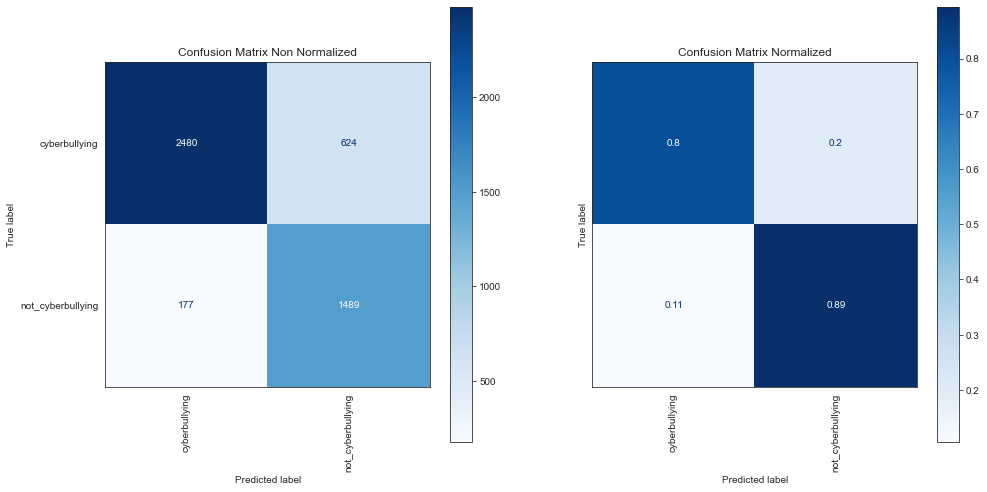

In [53]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), XGBClassifier(max_depth=10, use_label_encoder=False, eval_metric='mlogloss'))
pipeline.fit(X_biner_train, y_biner_train)

y_pred = pipeline.predict(X_biner_test)

print(pipeline.classification_report(y_biner_test, y_pred))
pipeline.confusion_matrix_display(y_biner_test, y_pred);

### Perbandingan Algoritma Pembelajaran Mesin 5 Label

#### Model Random Forest Classifier

                     precision    recall  f1-score   support

          ethnicity       0.94      0.95      0.94       751
             gender       0.91      0.71      0.79       827
  not_cyberbullying       0.97      0.58      0.73      1666
other_cyberbullying       0.40      0.88      0.55       710
           religion       0.90      0.91      0.91       816

           accuracy                           0.76      4770
          macro avg       0.82      0.81      0.79      4770
       weighted avg       0.86      0.76      0.78      4770



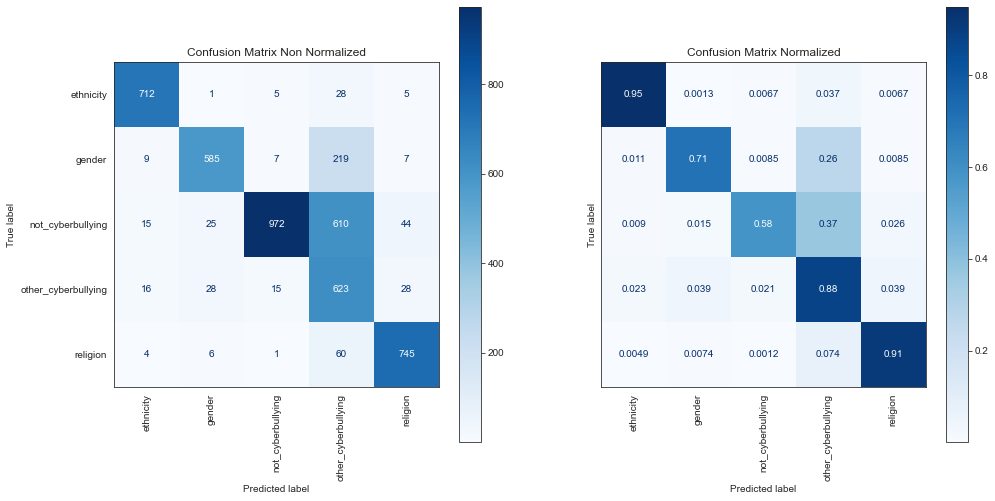

In [54]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), RandomForestClassifier(max_depth=3))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Naive Bayes Classifier

                     precision    recall  f1-score   support

          ethnicity       0.74      0.92      0.82       751
             gender       0.83      0.78      0.80       827
  not_cyberbullying       0.89      0.67      0.76      1666
other_cyberbullying       0.54      0.63      0.58       710
           religion       0.81      0.96      0.88       816

           accuracy                           0.77      4770
          macro avg       0.76      0.79      0.77      4770
       weighted avg       0.79      0.77      0.77      4770



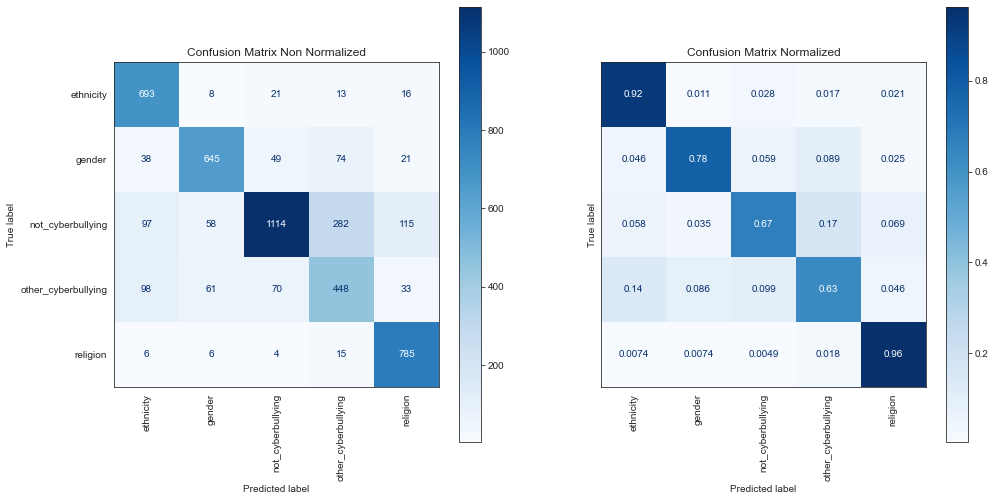

In [55]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), MultinomialNB())
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Decision Tree Classifier

                     precision    recall  f1-score   support

          ethnicity       1.00      0.63      0.77       751
             gender       0.95      0.49      0.64       827
  not_cyberbullying       0.97      0.43      0.60      1666
other_cyberbullying       0.25      0.98      0.40       710
           religion       0.97      0.46      0.62       816

           accuracy                           0.56      4770
          macro avg       0.83      0.60      0.61      4770
       weighted avg       0.87      0.56      0.61      4770



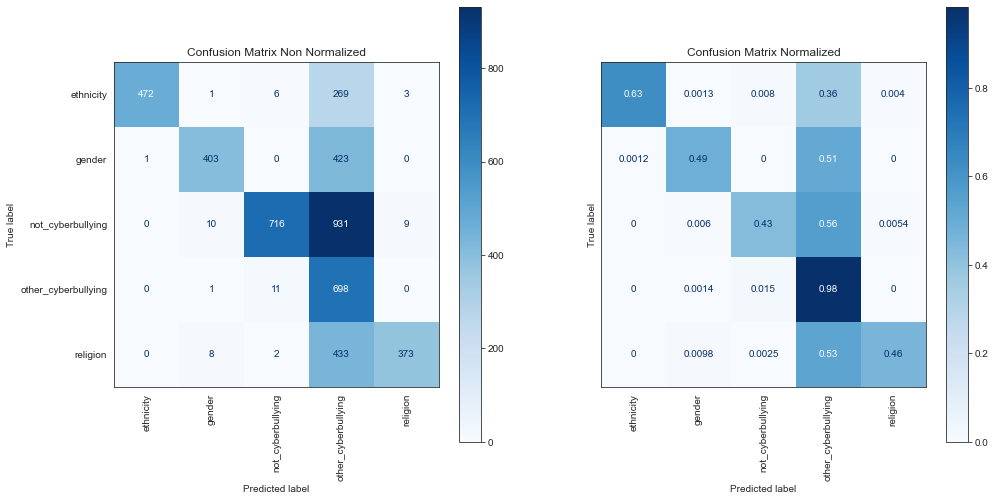

In [56]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), DecisionTreeClassifier(max_depth=5))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Neural Network MLP Classifier

                     precision    recall  f1-score   support

          ethnicity       0.91      0.94      0.93       751
             gender       0.79      0.80      0.79       827
  not_cyberbullying       0.84      0.68      0.75      1666
other_cyberbullying       0.46      0.63      0.53       710
           religion       0.89      0.91      0.90       816

           accuracy                           0.78      4770
          macro avg       0.78      0.79      0.78      4770
       weighted avg       0.80      0.78      0.78      4770



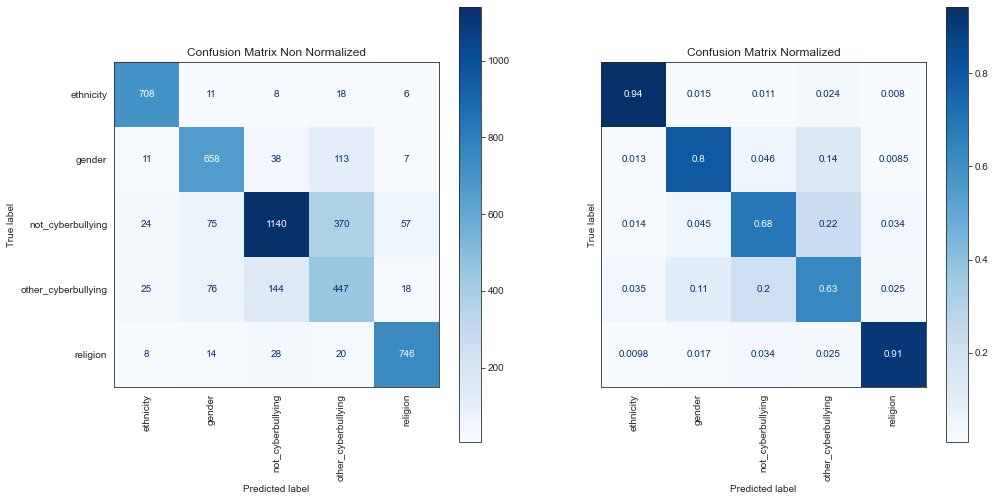

In [57]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), MLPClassifier(solver='adam', max_iter=300, alpha=1e-5, hidden_layer_sizes=(30, 30), random_state=1))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### kNN Classifier

                     precision    recall  f1-score   support

          ethnicity       0.20      0.97      0.34       751
             gender       0.58      0.27      0.37       827
  not_cyberbullying       0.70      0.22      0.34      1666
other_cyberbullying       0.41      0.11      0.18       710
           religion       0.93      0.08      0.15       816

           accuracy                           0.31      4770
          macro avg       0.56      0.33      0.27      4770
       weighted avg       0.60      0.31      0.29      4770



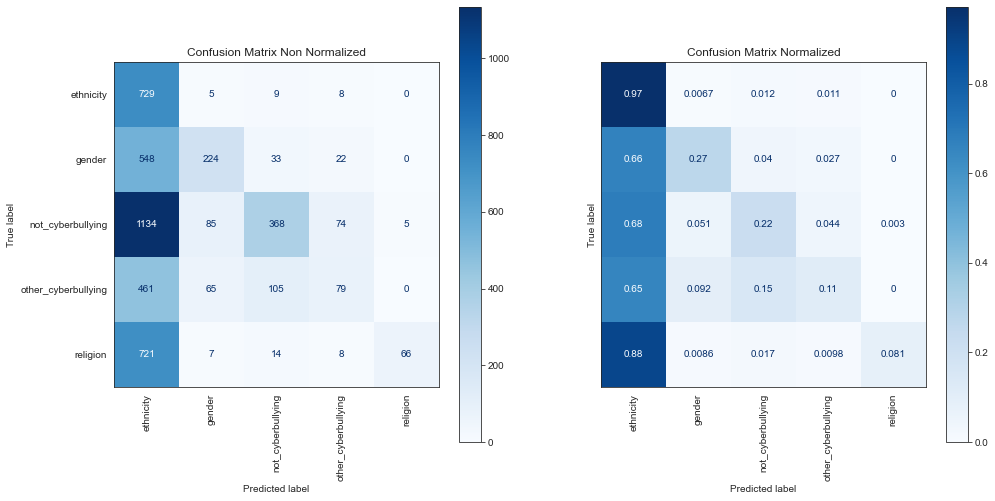

In [58]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), KNeighborsClassifier(n_neighbors=2))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

Semakin kecil k, didapatkan bahwa akurasi dan metric lainnya semakin baik. Mungkin dikarenakan pencarian kemiripan yang cukup 1-3 saja untuk melakukan klasifikasi dan jika lebih maka akan kurang sesuai.

#### Logistic Regression Classifier

                     precision    recall  f1-score   support

          ethnicity       0.97      0.97      0.97       751
             gender       0.89      0.81      0.85       827
  not_cyberbullying       0.94      0.67      0.78      1666
other_cyberbullying       0.50      0.89      0.64       710
           religion       0.94      0.94      0.94       816

           accuracy                           0.82      4770
          macro avg       0.85      0.86      0.84      4770
       weighted avg       0.87      0.82      0.83      4770



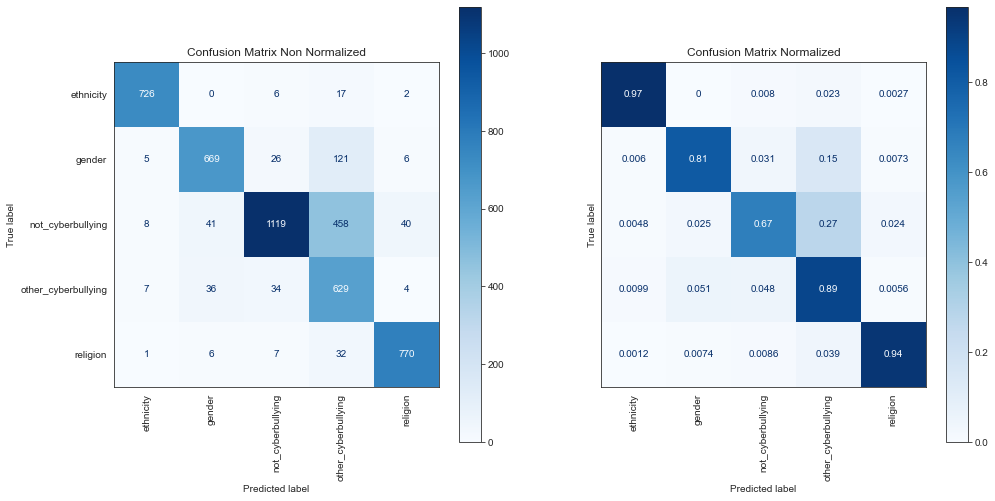

In [59]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LogisticRegression(solver='lbfgs', max_iter=2000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### Linear SVM Classifier

                     precision    recall  f1-score   support

          ethnicity       0.96      0.98      0.97       751
             gender       0.87      0.82      0.84       827
  not_cyberbullying       0.92      0.69      0.79      1666
other_cyberbullying       0.52      0.83      0.64       710
           religion       0.93      0.94      0.94       816

           accuracy                           0.82      4770
          macro avg       0.84      0.85      0.83      4770
       weighted avg       0.86      0.82      0.83      4770



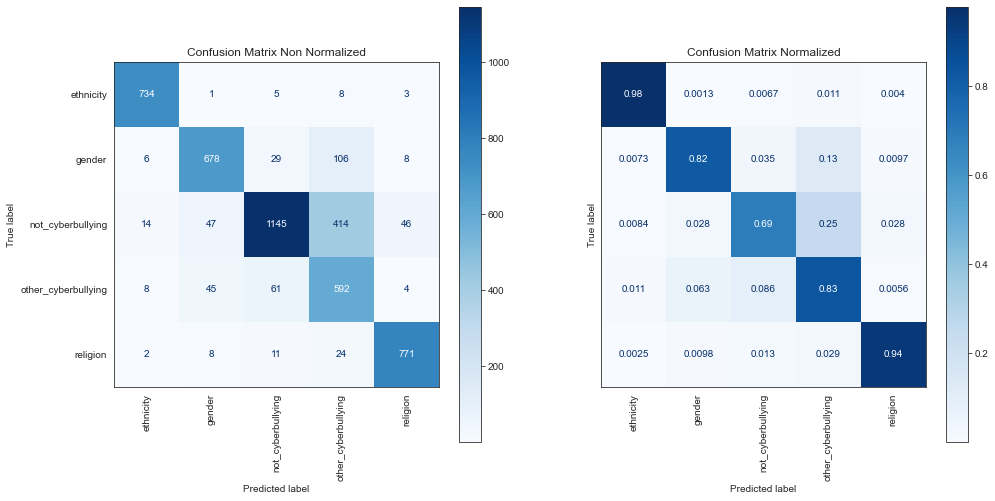

In [60]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LinearSVC(max_iter=10000))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

#### XGBoost Classifier

In [ ]:
pipeline = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), XGBClassifier(max_depth=10, use_label_encoder=False, eval_metric='mlogloss'))
pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

print(pipeline.classification_report(y_test, y_pred))
pipeline.confusion_matrix_display(y_test, y_pred);

## Evaluasi

### Metrik
Metrik utama yang saya gunakan dalam melakukan evaluasi adalah precision dan recall, diikuti dengan f1-score dan accuracy. Hal ini dikarenakan diperlukan pengamatan yang agak mendetail terkait dengan kemampuan klasifikasi. Selain itu, metrik precision-recall juga baik untuk menilai data yang bersifat imbalance, dimana diketahui bahwa akurasi sangat lemah terhadap data seperti itu. Data yang digunakan memiliki ketidakseimbangan sehingga diharapkan dengan menggunakan metrik ini akan mendapat yang terbaik.

### Model 2 Label Terbaik : Logistic Regression

In [ ]:
pipeline1 = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LogisticRegression(solver='lbfgs', max_iter=2000))
pipeline1.fit(X_biner_train, y_biner_train)

y_pred = pipeline1.predict(X_biner_test)

print(pipeline1.classification_report(y_biner_test, y_pred))

In [ ]:
pipeline1.confusion_matrix_display(y_biner_test, y_pred);

In [ ]:
pipeline1.precision_recall_curve(y_biner_test, pipeline1.predict_proba(X_biner_test));

Terlihat bahwa kemampuan klasifikasinya sudah termasuk cukup baik karena nilai precision yang lebih dari 73% dan nilai recall yang lebih dari 83% pada setiap labelnya. Nilai f1-score pun juga mengukuti baiknya karena memang diturunkan dari precision recall sehingga mendapat lebih dari 79% untuk setiap kelasnya. Dapat dilihat dari kurva precision recall, terdapat kondisi optimal pada nilai precision dan recall di sekitar 80%.

### Model 5 Label Terbaik : Linear SVM

In [ ]:
pipeline2 = ModelPipeline(RandomUnderSampler(), TfidfVectorizer(max_features=4000, ngram_range=(1,1)), LabelEncoder(), LinearSVC(max_iter=10000))
pipeline2.fit(X_train, y_train)

y_pred = pipeline2.predict(X_test)

print(pipeline2.classification_report(y_test, y_pred))

In [ ]:
pipeline2.confusion_matrix_display(y_test, y_pred);

Kemampuan untuk membedakan kelas sudah cukup baik, namun masih kurang pada label **not** (recall) dan **other** (precision). Artinya model masih kesulitan mengklasifikasikan kelas not dengan benar.

### Kesimpulan
Klasifikasi cyberbullying pada dasarnya cukup berhasil dilakukan. Konfigurasi terbaik ditemukan dengan menggunakan TF-IDF sebagai representasi vektor kalimat, Undersampling untuk menangani imbalance, dan Basis kata dibanding menggunakan bigram. Ditemukan bahwa 2 algoritma terbaik adalah LinearSVM dan Logistic Regression. Jika dilihat  dari kedua algoritma tersebut artinya terdapat kata-kata (vektor encoding) yang menonjol untuk setiap kelas sehingga dapat menjadi elemen pembeda dala proses klasifikasi. Hal ini juga teramati pada wordcloud yang mana kata kata dari setiap kelas cukup terindentifikasi unik. Kesulitan klasifikasi masih dihadapkan pada kelas not dan other, hal ini dapat ditingkatkan dengan menambah data dari domain yang lebih luas dan pelabelan yang lebih akurat.

### Save Model

In [ ]:
import dill

f = open("../model/model_biner.pkl", "wb")
dill.dump(pipeline1, f, recurse=True)
f.close()

f = open("../model/model_multi.pkl", "wb")
dill.dump(pipeline2, f, recurse=True)
f.close()